In [2]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
%matplotlib inline

Using TensorFlow backend.


(2771, 2978, 3)


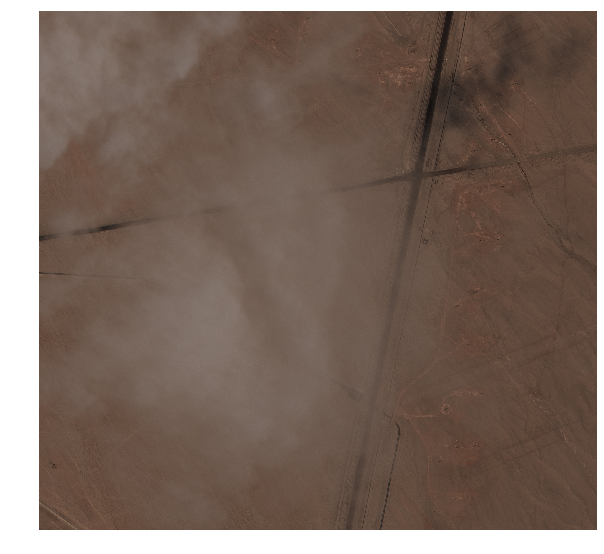

In [3]:
#Load an image
chip_size = (224,224)
chip_name =  '659.tif'
file_name = '../data/train/' + chip_name
arr = wv.get_image(file_name)
print(arr.shape)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(arr)

In [4]:
#Loading our labels
coords, chips, classes = wv.get_labels('../data/xView_train.geojson')


100%|██████████| 601937/601937 [00:02<00:00, 208095.57it/s]


In [9]:
import operator
size_dict = {}
counter = 0
print('classes')
print(classes)
for ind,x in enumerate(coords):
    wid = int(x[2] - x[0])
    hei = int(x[3] - x[1])
    if wid > 3000:
        print(chips[ind])
    if wid in size_dict:
        size_dict[wid] = size_dict[wid] + 1
    else:
        size_dict[wid] = 1
        
    if hei in size_dict:
        size_dict[hei] = size_dict[hei] + 1
    else:
        size_dict[hei] = 1
    counter = counter + 2


sorted_x = sorted(size_dict.items(), key=operator.itemgetter(0), )
print('counter')
print(counter)
print('chips')
print(chips)


classes
[73. 73. 73. ... 73. 73. 73.]
289.tif
641.tif
658.tif
659.tif
counter
1203874
chips
['2355.tif' '2355.tif' '2355.tif' ... '389.tif' '389.tif' '389.tif']


In [5]:
#We only want to coordinates and classes that are within our chip
coords = coords[chips==chip_name]
classes = classes[chips==chip_name].astype(np.int64)
print(classes)


[79]


In [6]:
#Load the class number -> class string label map
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [7]:
#We can find which classes are present in this image
print([labels[i] for i in np.unique(classes)])

['Construction Site']


In [8]:
#We can chip the image into 500x500 chips
c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords, classes=classes, shape=chip_size)
print("Num Chips: %d" % c_img.shape[0])

Num Chips: 156


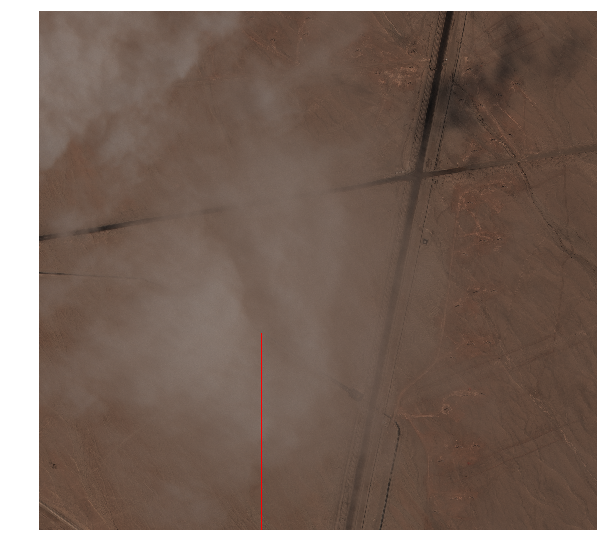

In [9]:
#We can plot some of the chips
# fig,ax = plt.subplots(3)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
height,width,channels = arr.shape
num_chips_x = int(width/chip_size[1])
num_chips_y = int(height/chip_size[0])
# for k in range(num_chips_y):
#     for e in range(num_chips_x):
#         plt.subplot(num_chips_x,num_chips_y,k*num_chips_x+e+1)
#         plt.axis('off')
#         plt.imshow(c_img[(k*num_chips_x+e)])
labelled = aug.draw_bboxes(arr,coords)
plt.axis('off')
plt.imshow(labelled)
plt.show()

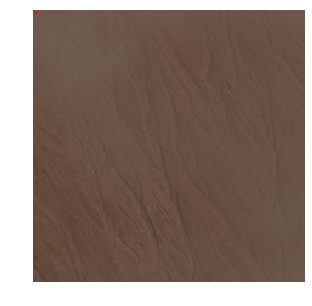

In [10]:
#We can visualize the chips with their labels
# ind = np.random.choice(range(c_img.shape[0]))
ind = 7
labelled = aug.draw_bboxes(c_img[ind],c_box[ind])
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(labelled)

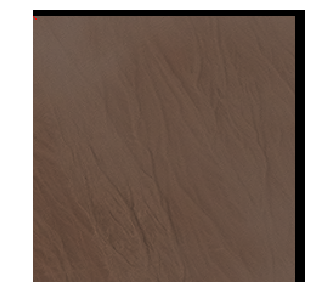

In [11]:
#We can shift the chips
i1,b1 = aug.shift_image(c_img[ind],c_box[ind])
a1 = aug.draw_bboxes(i1,b1)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a1)

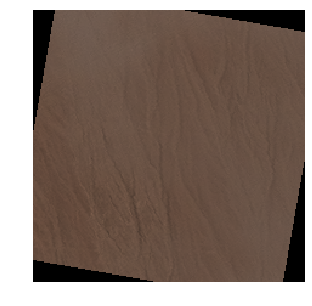

In [12]:
#We can rotate the chips
center = (int(c_img[ind].shape[0]/2),int(c_img[ind].shape[1]/2))
i2,b2 = aug.rotate_image_and_boxes(c_img[ind],10, center, c_box[ind])
a2 = aug.draw_bboxes(i2,b2)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a2)

In [13]:
#There are other augmentations available in 'aug_util.py'
#From here, you can save out the chipped images to a TFRecord or other medium
#Use 'process_wv.py' to create a TFRecord file from xView imagery

In [14]:
# load the model
model = VGG16()
# load an image from file
# image = load_img('cat.jpeg', target_size=(224, 224))
# convert the image pixels to a numpy array
# image = img_to_array(image)
image = c_img[7]
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

mosquito_net (5.14%)
